# House Price Prediction

### Importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LassoCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, cross_val_score
from scipy.stats import skew  
from xgboost import XGBRegressor

from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Read Data

In [2]:
# Read Train and Test data set
train = pd.read_csv('train.csv', index_col='Id')
test = pd.read_csv('test.csv', index_col='Id')

In [3]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


### Data information

In [6]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
test.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [7]:
train.shape

(1460, 80)

In [8]:
test.shape

(1459, 79)

In [9]:
train.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

In [10]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

### Checking for Missing Values

In [12]:
missing=[]
for var in train.columns:
    if(train[var].isna().sum()>0):
        print(var, train[var].isnull().mean())
        missing.append(var)

LotFrontage 0.1773972602739726
Alley 0.9376712328767123
MasVnrType 0.005479452054794521
MasVnrArea 0.005479452054794521
BsmtQual 0.025342465753424658
BsmtCond 0.025342465753424658
BsmtExposure 0.026027397260273973
BsmtFinType1 0.025342465753424658
BsmtFinType2 0.026027397260273973
Electrical 0.0006849315068493151
FireplaceQu 0.4726027397260274
GarageType 0.05547945205479452
GarageYrBlt 0.05547945205479452
GarageFinish 0.05547945205479452
GarageQual 0.05547945205479452
GarageCond 0.05547945205479452
PoolQC 0.9952054794520548
Fence 0.8075342465753425
MiscFeature 0.963013698630137


Identified list of features which has missing values in the Train data set. Here, Alley, PoolQC, Fence, MiscFeature features are more than 80% of missing values. 

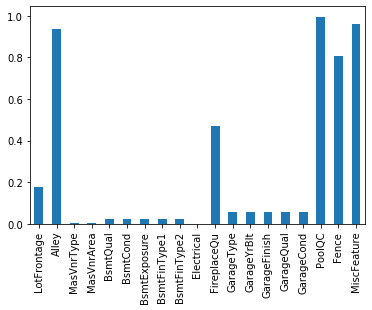

In [13]:
mis = train.isnull().mean()
mis = mis[mis>0]
mis.plot.bar()

The above Line graph visualize the maximum missing values features. 

### Viewing Columns

In [14]:
num_var = train.select_dtypes(exclude=['object']).drop(['SalePrice'], axis=1).copy()

In [15]:
print(num_var.columns)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')


Spliting Numeric and Non-numeric features

In [16]:
cat_var = train.select_dtypes(include=['object']).copy()

In [17]:
print(cat_var.columns)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


Split Categorical features and save it cat_var.

### Distribution of Data

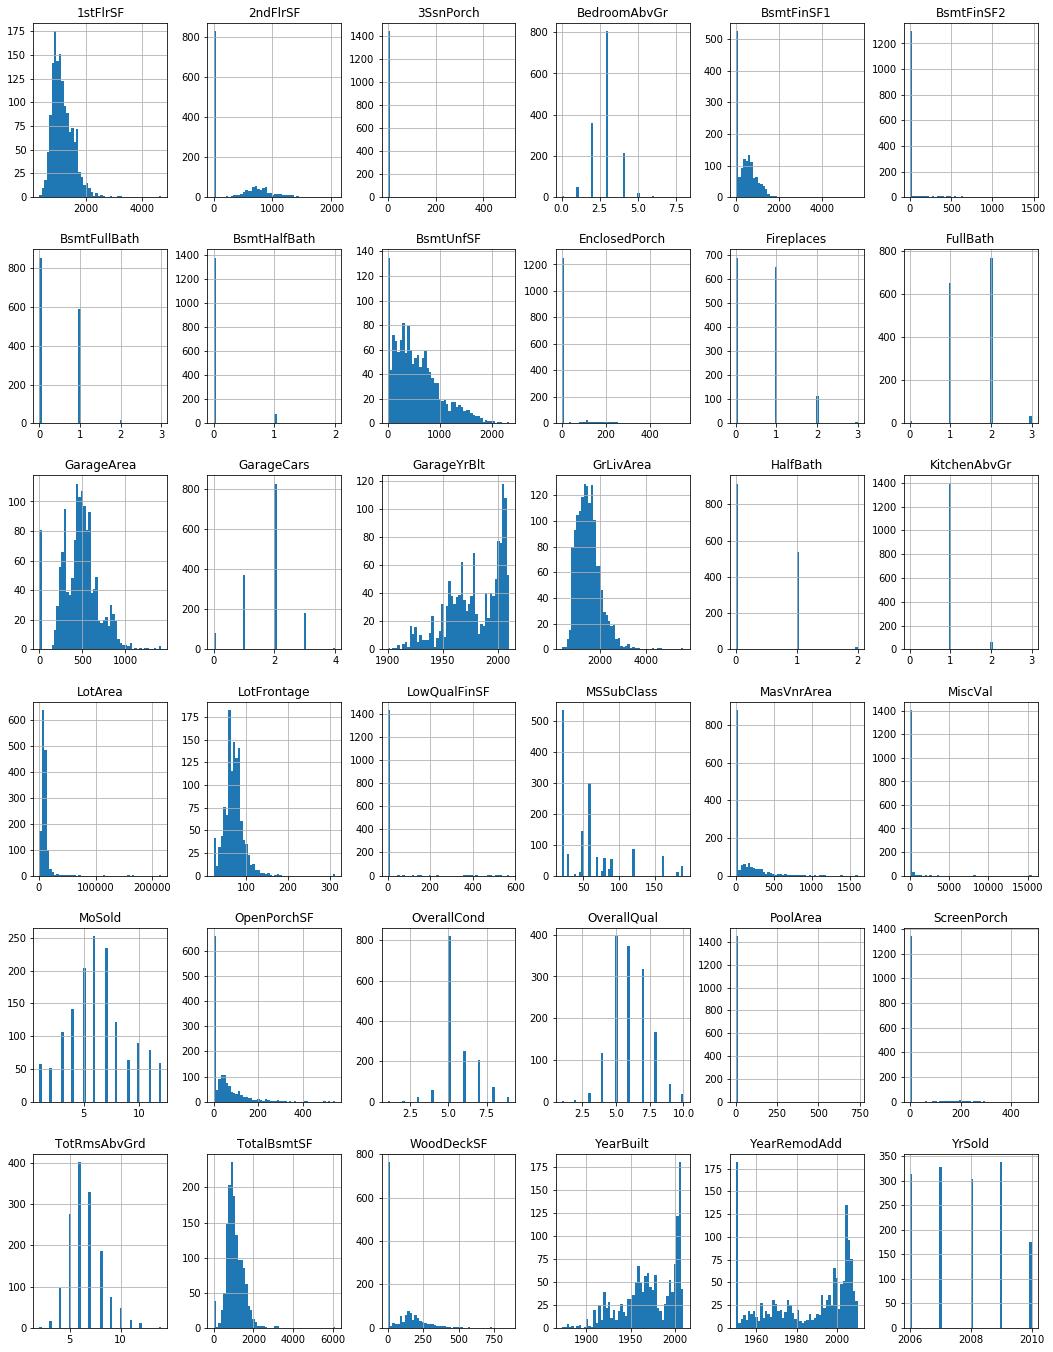

In [18]:
num_var.hist(bins=50, figsize=(18, 24))
plt.show()

#### Univariant Analysis

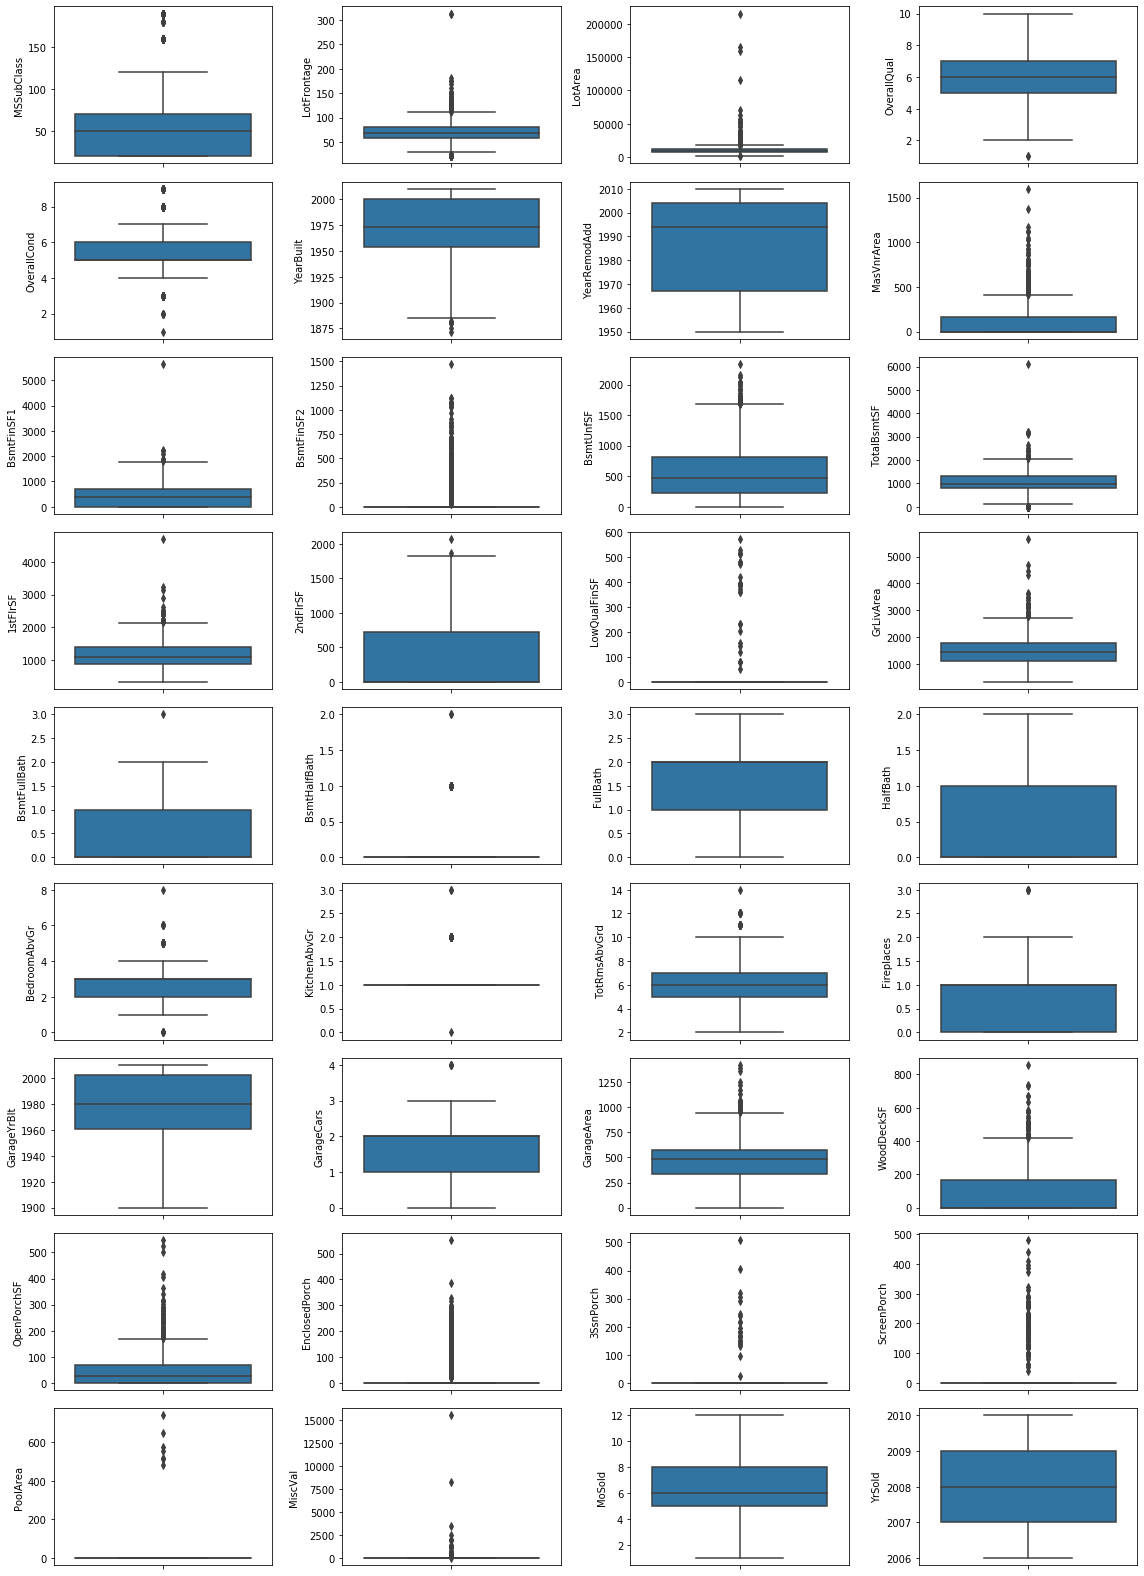

In [19]:
fig = plt.figure(figsize=(16,22))
for i in range(len(num_var.columns)):
    try:
        fig.add_subplot(9,4,i+1)
        sns.boxplot(y=num_var.iloc[:,i])
        
    except ValueError:
        print('Captured exception!!')
plt.tight_layout()
plt.show()

#### Bivariant Analysis

Exception has been handled!
Exception has been handled!
Exception has been handled!
Exception has been handled!
Exception has been handled!
Exception has been handled!
Exception has been handled!
Exception has been handled!
Exception has been handled!


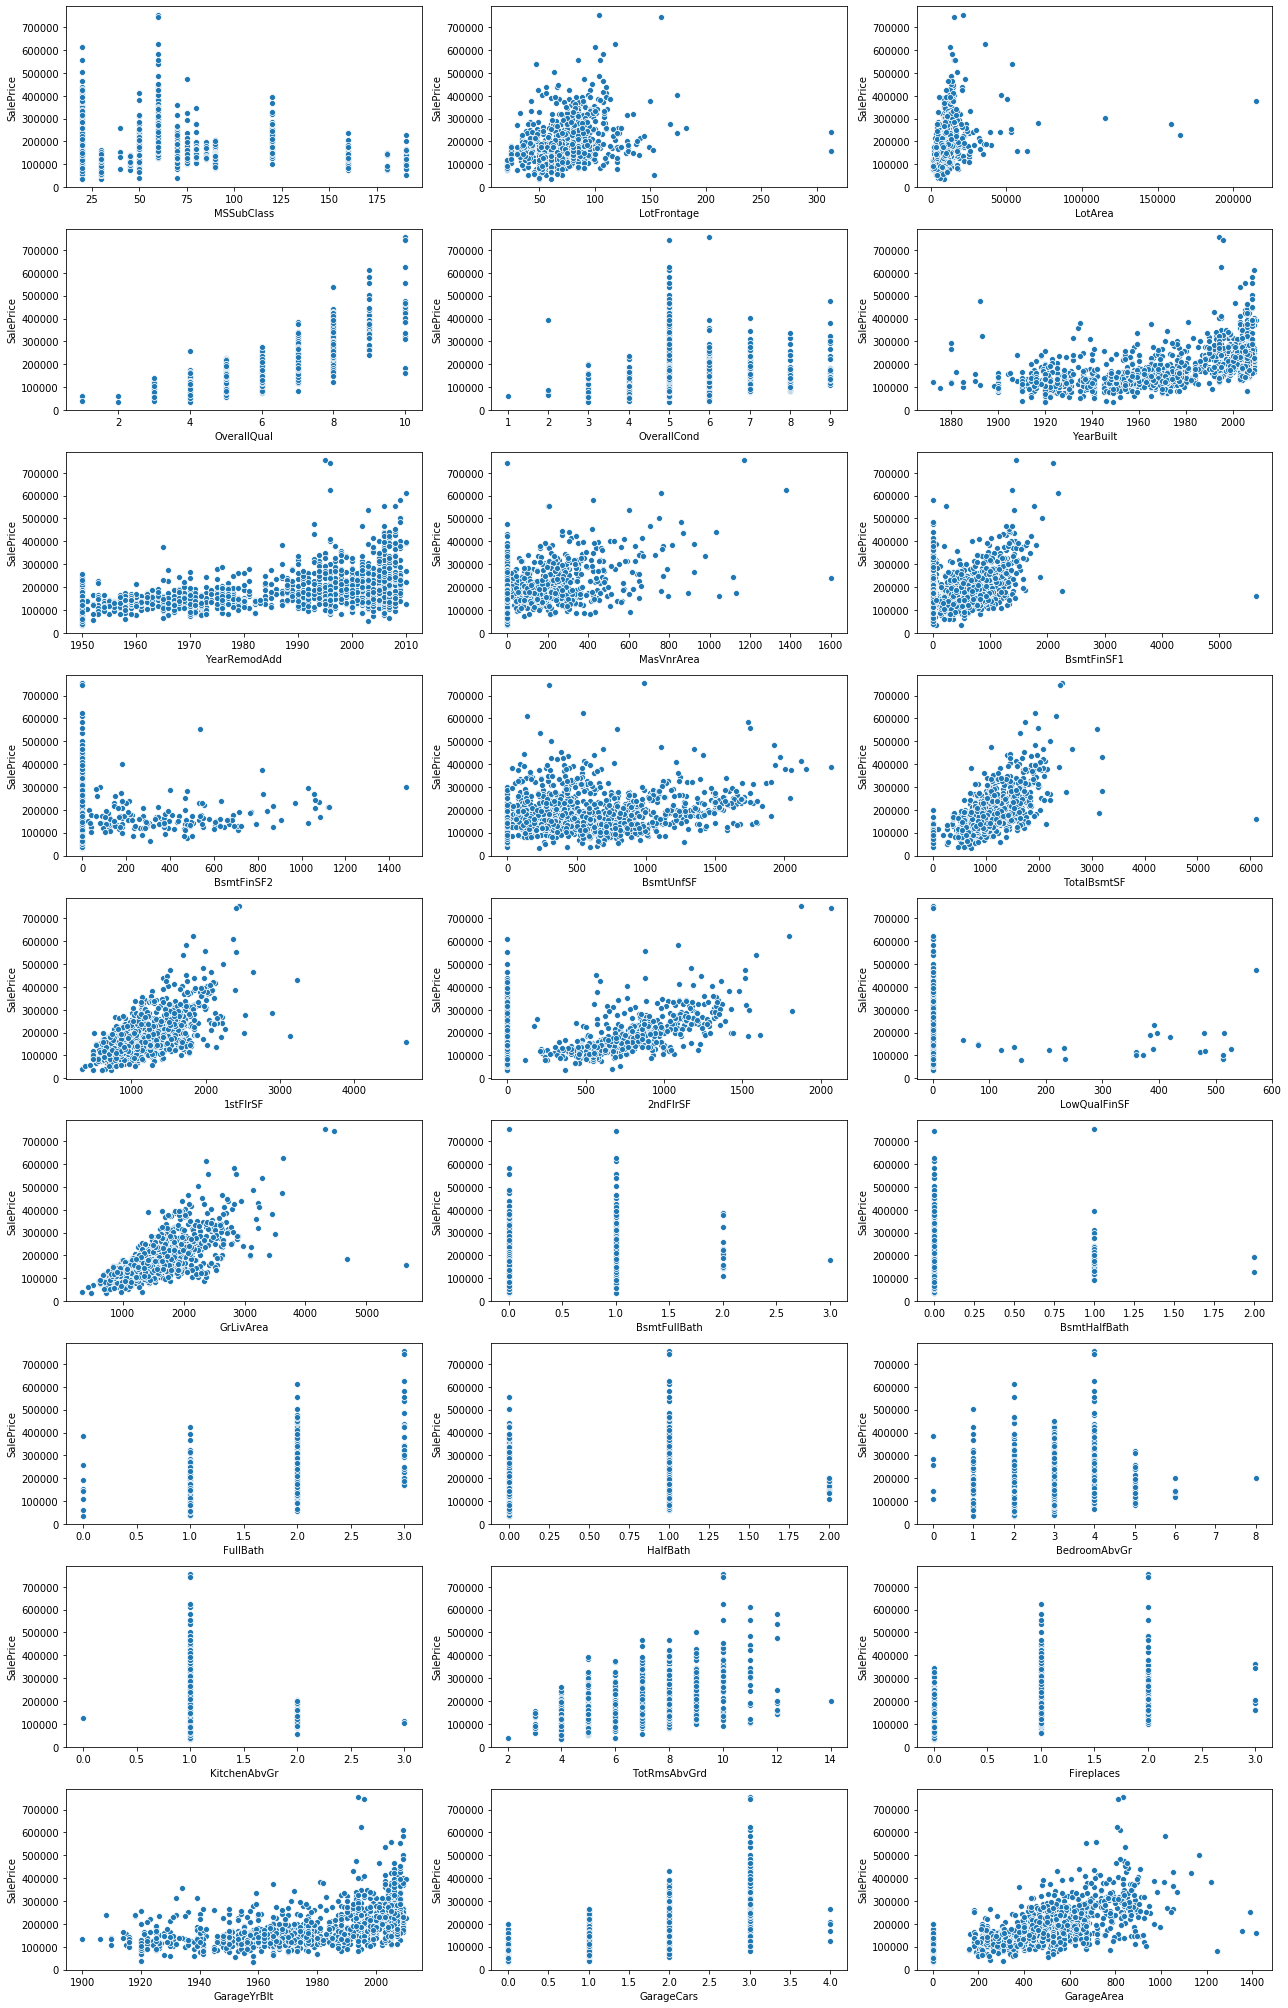

In [20]:
fig = plt.figure(figsize=(18,28))
for i in range(len(num_var.columns)):
    try:
        fig.add_subplot(9, 3, i+1)
        sns.scatterplot(num_var.iloc[:, i],train['SalePrice'])
    except ValueError:
        print('Exception has been handled!')
plt.tight_layout()
plt.show()

### Data preprocessing 

#### Outliers

In [21]:
def analysis_plots(df, var1, var2):
    plt.figure(figsize=(16, 4))

    plt.subplot(1, 2, 1)
    sns.regplot(x = df[var1], y = df['SalePrice'], data = train, color="g")

    plt.subplot(1, 2, 2)
    sns.regplot(x = df[var2], y = df['SalePrice'], data = train, color="g")

    plt.show()

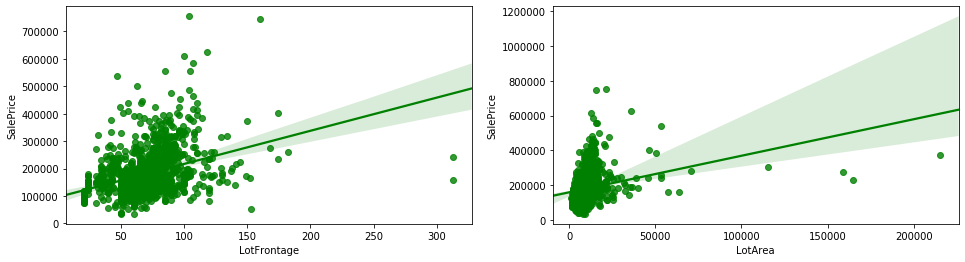

In [22]:
analysis_plots(train, 'LotFrontage', 'LotArea')

In [23]:
train['LotFrontage'].shape

(1460,)

In [24]:
train = train.drop(train[train['LotFrontage']>200].index)

In [25]:
train['LotFrontage'].shape

(1458,)

In [26]:
train['LotArea'].shape

(1458,)

In [27]:
train = train.drop(train[train['LotArea']>50000].index)

In [28]:
train['LotArea'].shape

(1448,)

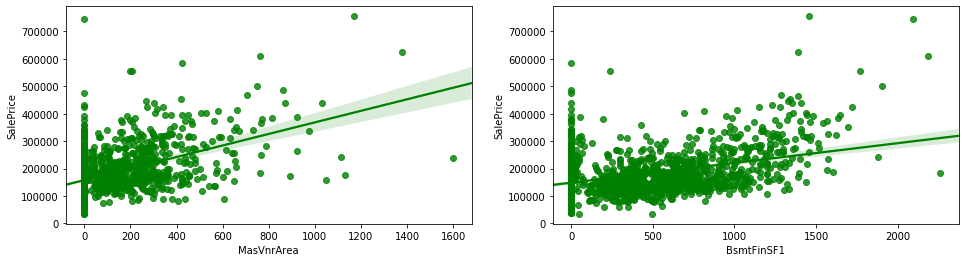

In [29]:
analysis_plots(train, 'MasVnrArea', 'BsmtFinSF1')

In [30]:
train = train.drop(train[train['MasVnrArea']>1200].index)

In [31]:
train = train.drop(train[train['BsmtFinSF1']>2000].index)

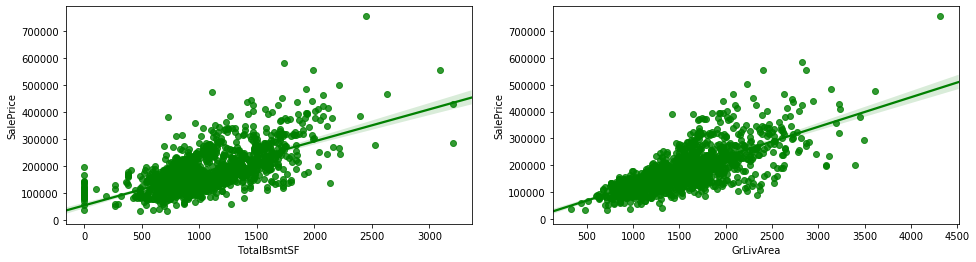

In [32]:
analysis_plots(train, 'TotalBsmtSF', 'GrLivArea')

In [33]:
train = train.drop(train[train['TotalBsmtSF']>2500].index)

In [34]:
train = train.drop(train[train['GrLivArea']>3500].index)

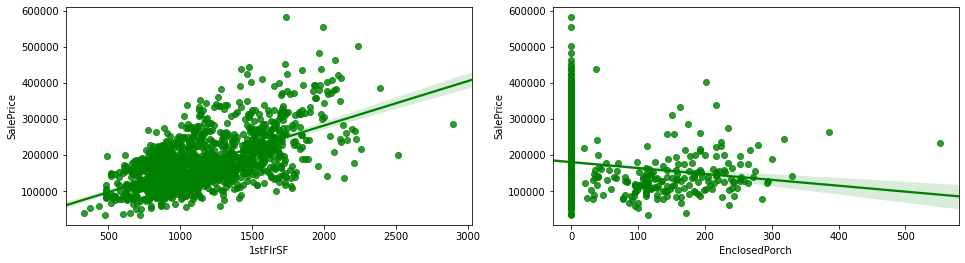

In [35]:
analysis_plots(train, '1stFlrSF', 'EnclosedPorch')

In [36]:
train = train.drop(train[train['1stFlrSF']>2300].index)

In [37]:
train = train.drop(train[train['EnclosedPorch']>300].index)

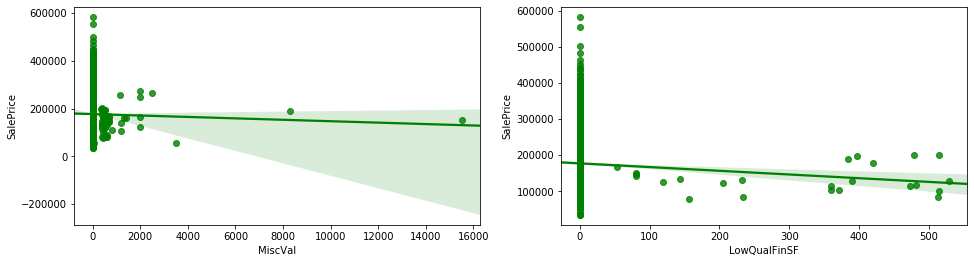

In [38]:
analysis_plots(train, 'MiscVal', 'LowQualFinSF')

In [39]:
train = train.drop(train[train['MiscVal']>4000].index)

#### Removing certain features

##### Identify highly-correlated variables in Train and Test data set

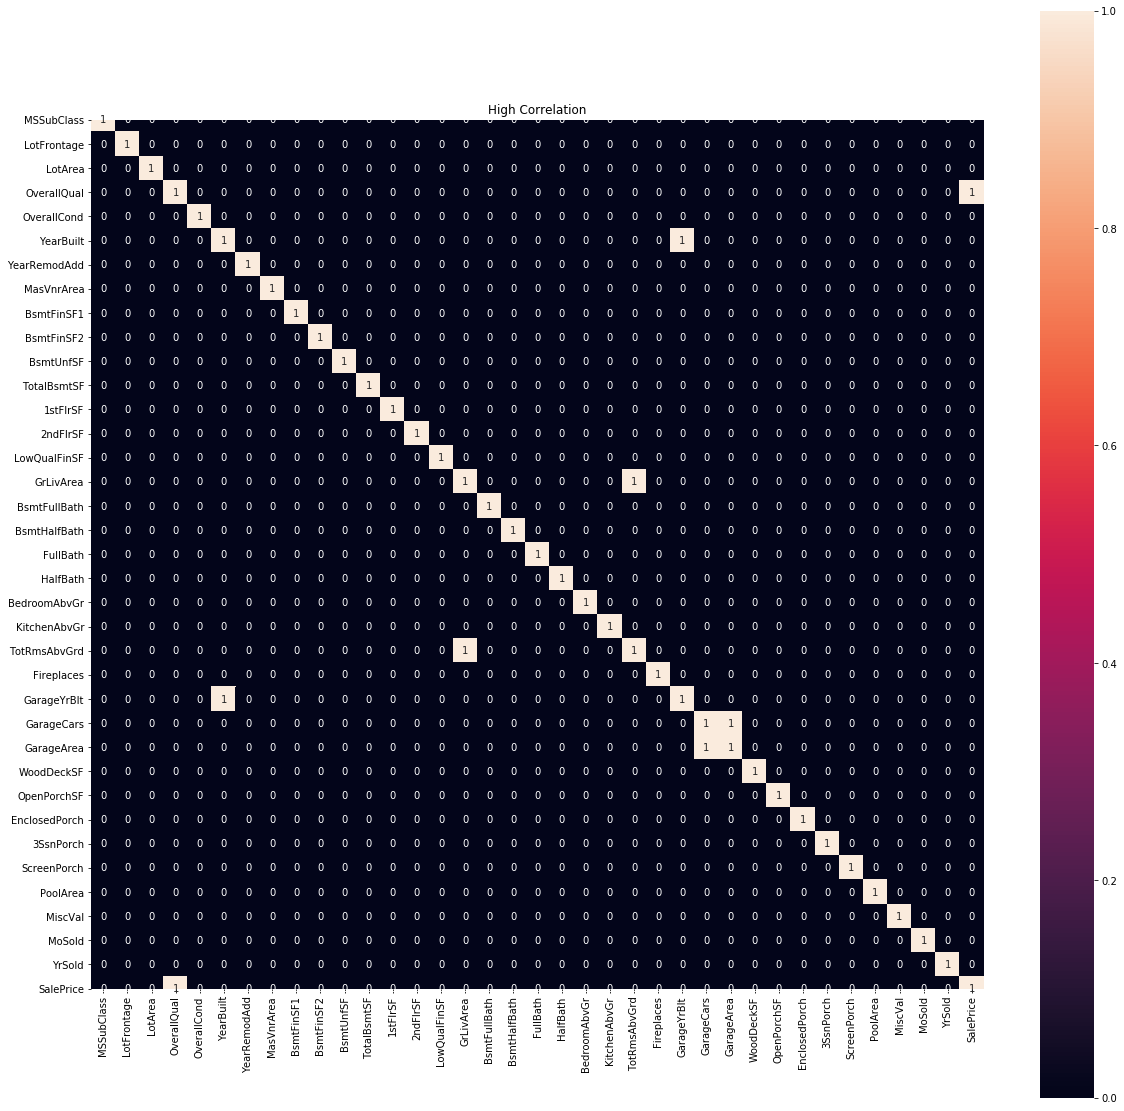

In [40]:
num_correlation = train.select_dtypes(exclude='object').corr()
plt.figure(figsize=(20,20))
plt.title('High Correlation')
sns.heatmap(num_correlation > 0.8, annot=True, square=True)

###### Highly-Correlated Features
  ToRmsAbvGrd - GrliveArea, 
  GarageYrBlt - YearBuilt, 
  GarageArea - GarageCars

The Dataset has perfectly positive or negative attributes then there is a high chance that the performance of the model will be impacted by a problem called 'Multicollinearity'. Multicollinearity happens when one predictor variable in a multiple regression model can be linearly predicted from the others with a high degree of accuracy. This can lead to skewed or misleading results.

In [41]:
corr = num_correlation.corr()
print(corr['SalePrice'].sort_values(ascending=False))

SalePrice        1.000000
OverallQual      0.960235
GarageCars       0.912763
GarageArea       0.902922
YearBuilt        0.813587
FullBath         0.808835
TotalBsmtSF      0.806247
YearRemodAdd     0.781940
MasVnrArea       0.781350
1stFlrSF         0.780985
GrLivArea        0.780382
GarageYrBlt      0.777860
Fireplaces       0.697713
TotRmsAbvGrd     0.599620
OpenPorchSF      0.591687
LotFrontage      0.567379
WoodDeckSF       0.550653
LotArea          0.513701
BsmtUnfSF        0.448447
BsmtFinSF1       0.438715
HalfBath         0.394027
2ndFlrSF         0.255450
BsmtFullBath     0.244154
BedroomAbvGr     0.188941
MoSold           0.013273
ScreenPorch     -0.014129
3SsnPorch       -0.021612
PoolArea        -0.138341
YrSold          -0.227552
BsmtFinSF2      -0.245836
MSSubClass      -0.248775
BsmtHalfBath    -0.259771
LowQualFinSF    -0.307949
MiscVal         -0.347198
KitchenAbvGr    -0.371048
OverallCond     -0.484187
EnclosedPorch   -0.538199
Name: SalePrice, dtype: float64


In [42]:
train.drop(columns=['GarageArea','TotRmsAbvGrd','GarageYrBlt'],axis=1,inplace=True) 

In [43]:
test.drop(columns=['GarageArea','TotRmsAbvGrd','GarageYrBlt'],axis=1,inplace=True) 

#### Identify Missing Values

In [44]:
train.isnull().mean().sort_values(ascending=False).head(5)

PoolQC         0.997195
MiscFeature    0.964937
Alley          0.937588
Fence          0.805750
FireplaceQu    0.482468
dtype: float64

Remove top 3 missing features(PoolQC, MiscFeature and Alley)

In [45]:
train.drop(columns=['PoolQC', 'MiscFeature', 'Alley'],axis=1, inplace=True)

In [46]:
test.drop(columns=['PoolQC', 'MiscFeature', 'Alley'],axis=1, inplace=True)

In [47]:
train.isnull().sum()[train.isnull().sum()>0]

LotFrontage      246
MasVnrType         7
MasVnrArea         7
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      37
Electrical         1
FireplaceQu      688
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
Fence           1149
dtype: int64

In [48]:
missing=[]
for var in train.columns:
    if (train[var].isnull().sum() > 0):
        print(var, train[var].isnull().sum())
        missing.append(var)

LotFrontage 246
MasVnrType 7
MasVnrArea 7
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 37
Electrical 1
FireplaceQu 688
GarageType 81
GarageFinish 81
GarageQual 81
GarageCond 81
Fence 1149


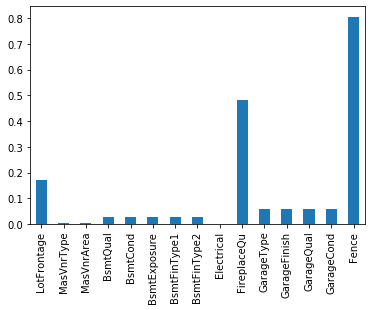

In [49]:
mis = train.isnull().mean()
mis = mis[mis>0]
mis.plot.bar()

In [50]:
num = train.select_dtypes(exclude='object').isnull().mean()
num

MSSubClass       0.000000
LotFrontage      0.172511
LotArea          0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
MasVnrArea       0.004909
BsmtFinSF1       0.000000
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF      0.000000
1stFlrSF         0.000000
2ndFlrSF         0.000000
LowQualFinSF     0.000000
GrLivArea        0.000000
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
FullBath         0.000000
HalfBath         0.000000
BedroomAbvGr     0.000000
KitchenAbvGr     0.000000
Fireplaces       0.000000
GarageCars       0.000000
WoodDeckSF       0.000000
OpenPorchSF      0.000000
EnclosedPorch    0.000000
3SsnPorch        0.000000
ScreenPorch      0.000000
PoolArea         0.000000
MiscVal          0.000000
MoSold           0.000000
YrSold           0.000000
SalePrice        0.000000
dtype: float64

In [51]:
def impute_na(df, variable, mean_median):
    return df[variable].fillna(mean_median).astype(int)

In [52]:
train['LotFrontage'] = impute_na(train, 'LotFrontage', 69.0)

In [53]:
train['LotFrontage'].isnull().sum()

0

In [54]:
test['LotFrontage'] = impute_na(test, 'LotFrontage', 69.0)

In [55]:
test['LotFrontage'].isnull().sum()

0

In [56]:
cat_var = train.select_dtypes(include='object').columns
print(cat_var)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')


In [57]:
train.select_dtypes(include='object').isnull().sum()

MSZoning            0
Street              0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       37
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       688
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
Fence            1149
SaleType            0
SaleCondition       0
dtype: int64

In [58]:
train.select_dtypes(include='object').isnull().mean()

MSZoning         0.000000
Street           0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.004909
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025947
BsmtCond         0.025947
BsmtExposure     0.026648
BsmtFinType1     0.025947
BsmtFinType2     0.025947
Heating          0.000000
HeatingQC        0.000000
CentralAir       0.000000
Electrical       0.000701
KitchenQual      0.000000
Functional       0.000000
FireplaceQu      0.482468
GarageType       0.056802
GarageFinish     0.056802
GarageQual       0.056802
GarageCond       0.056802
PavedDrive       0.000000
Fence            0.805750
SaleType    

In [59]:
train.select_dtypes(include='object').isnull().mean().sort_values(ascending=False).head(15)

Fence           0.805750
FireplaceQu     0.482468
GarageCond      0.056802
GarageQual      0.056802
GarageFinish    0.056802
GarageType      0.056802
BsmtExposure    0.026648
BsmtQual        0.025947
BsmtFinType1    0.025947
BsmtCond        0.025947
BsmtFinType2    0.025947
MasVnrType      0.004909
Electrical      0.000701
Condition1      0.000000
Neighborhood    0.000000
dtype: float64

In [60]:
train['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [61]:
train['BsmtQual'].fillna('Missing', inplace=True)

In [62]:
test['BsmtQual'].fillna('Missing', inplace=True)

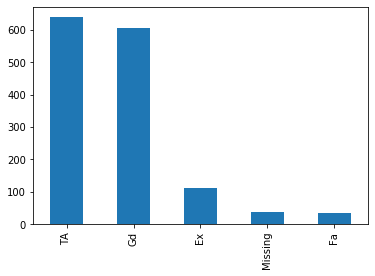

In [63]:
train['BsmtQual'].value_counts().sort_values(ascending=False).plot.bar()


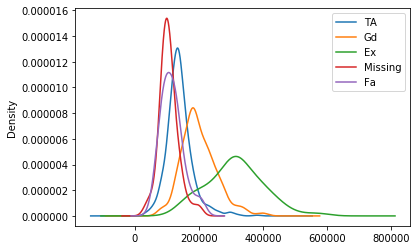

In [64]:
# Plot the distribution of the target for the houses
# that show the different categories of the variable

fig = plt.figure()
ax = fig.add_subplot(111)

# a plot per category
train[train['BsmtQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)
train[train['BsmtQual']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)
train[train['BsmtQual']=='Ex']['SalePrice'].plot(kind='kde', ax=ax)
train[train['BsmtQual']=='Missing']['SalePrice'].plot(kind='kde', ax=ax)
train[train['BsmtQual']=='Fa']['SalePrice'].plot(kind='kde', ax=ax)

# add the legend
lines, labels = ax.get_legend_handles_labels()
labels = ['TA', 'Gd', 'Ex', 'Missing', 'Fa']
ax.legend(lines, labels, loc='best')

In [65]:
cat_null_val = ['FireplaceQu', 'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType', 'BsmtExposure', 'BsmtQual', 
                'BsmtFinType1', 'BsmtFinType2', 'BsmtCond', 'MasVnrType', 'Electrical', 'Condition1', 'Neighborhood']

In [66]:
for var in cat_null_val:
    train[var].fillna('Missing', inplace=True)

In [67]:
[var for var in cat_null_val if train[var].isnull().sum() > 0]

[]

In [68]:
for var in cat_null_val:
    test[var].fillna('Missing', inplace=True)

In [69]:
[var for var in cat_null_val if test[var].isnull().sum() > 0]

[]

In [70]:
list(train.select_dtypes(exclude='object').columns)

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

#### Identifying relationship between features

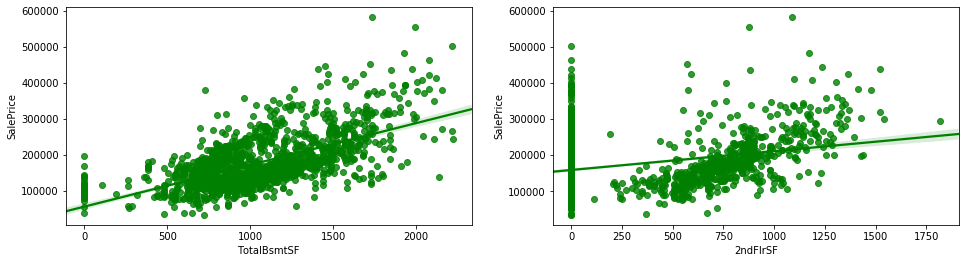

In [71]:
analysis_plots(train, 'TotalBsmtSF', '2ndFlrSF')

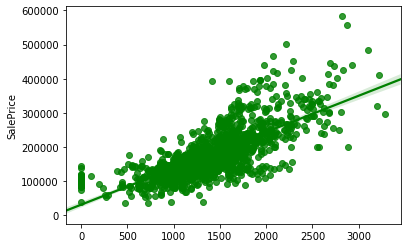

In [72]:
x = sns.regplot(train['TotalBsmtSF'] + train['2ndFlrSF'], train['SalePrice'], data=train, color="g")

#### Create "TotalSF" feature

In [73]:
train['TotalSF'] = train['TotalBsmtSF'] + train['2ndFlrSF']

In [74]:
test['TotalSF'] = test['TotalBsmtSF'] + test['2ndFlrSF']

#### Create "Has2nfFloor", "HasBsmtSF", "HasFireplace" and "Has2ndFloor" features

In [75]:
train['Has2nfFloor'] = train['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
train['HasBsmtSF'] = train['TotalBsmtSF'].apply(lambda x:1 if x > 0 else 0)
train['HasFireplace'] = train['Fireplaces'].apply(lambda x:1 if x > 0 else 0)
train['Has2ndFloor'] = train['2ndFlrSF'].apply(lambda x:1 if x > 0 else 0)


In [76]:
test['Has2nfFloor'] = test['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
test['HasBsmtSF'] = test['TotalBsmtSF'].apply(lambda x:1 if x > 0 else 0)
test['HasFireplace'] = test['Fireplaces'].apply(lambda x:1 if x > 0 else 0)
test['Has2ndFloor'] = test['2ndFlrSF'].apply(lambda x:1 if x > 0 else 0)


#### Sales Price Visual Distribution

Skew of SalePrice: 1.3525733376841333


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


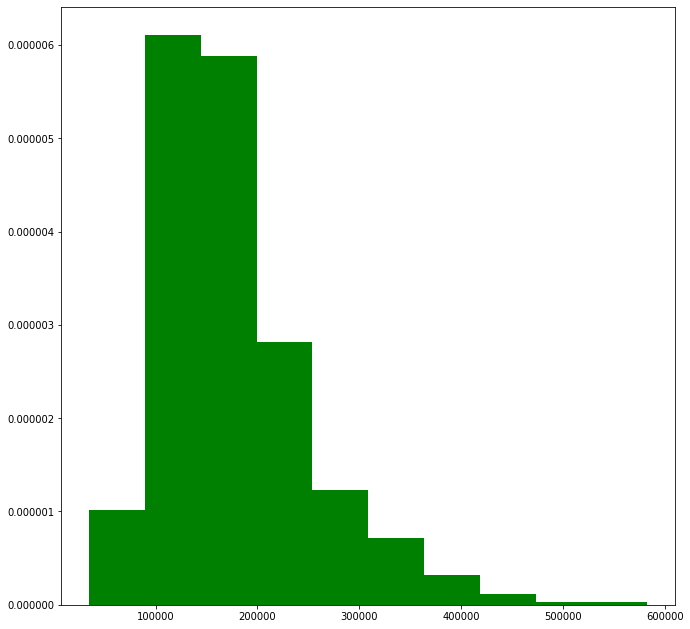

In [77]:
fig = plt.figure(figsize=(11,11))

print ("Skew of SalePrice:", train.SalePrice.skew())
plt.hist(train.SalePrice, normed=1, color='g')
plt.show()

Skew of Log-Transformed SalePrice: -0.007144421172099306


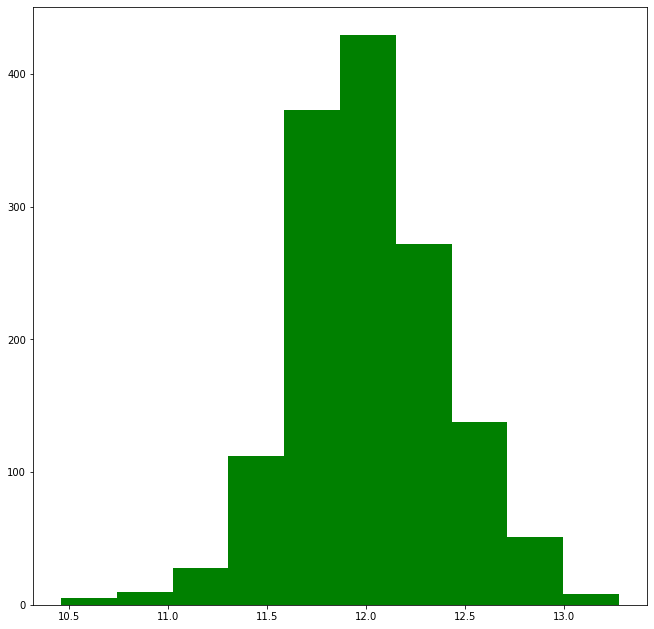

In [78]:
fig = plt.figure(figsize=(11,11))

print ("Skew of Log-Transformed SalePrice:", np.log1p(train.SalePrice).skew())
plt.hist(np.log(train.SalePrice), color='green')
plt.show()

### Modeling

In [79]:
X = train.drop(['SalePrice'], axis=1)
y = np.log1p(train['SalePrice'])

Split X and y into train and valid data for model testing

In [80]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=2)

In [81]:
cate_cols = [cname for cname in X.columns if
                    X[cname].nunique() <= 30 and
                    X[cname].dtype == "object"] 
                


num_cols = [cname for cname in X.columns if
                 X[cname].dtype in ['int64','float64']]


my_cols = num_cols + cate_cols

X_train = X_train[my_cols].copy()
X_valid = X_valid[my_cols].copy()
X_test = test[my_cols].copy()

Here we create a 'num_transformer' and a 'cat_transformer' for imputing and hot-encoding numerical and categorical values. We then store these transformers into a preprocessor column transformer

In [82]:
num_transformer = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='constant'))
    ])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),       
        ('cat',cat_transformer,cate_cols),
        ])

In [83]:
#Reversing log transfermation of y
def invert(var):
    return np.exp(var)
    

### Finding the best model

#### Linear Regression 

In [84]:
#Linear Regression Model
from sklearn import linear_model
from sklearn import r2
model = linear_model.LinearRegression(fit_intercept=True, normalize=False)
linear = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
linear.fit(X_train, y_train)
predict = linear.predict(X_valid)
print('Regression: ' + str(mean_absolute_error(invert(predict), invert(y_valid))))

Regression: 15596.979915309483


#### Ridge Regression

In [85]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.002, random_state=5, fit_intercept=True, normalize=False)
ridge = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
ridge.fit(X_train, y_train)
predict = ridge.predict(X_valid)
print('Ridge value: '+ str(mean_absolute_error(invert(predict), invert(y_valid))))

Ridge value: 21271.60479501756


In [86]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.002, random_state=5, fit_intercept=True, normalize=False)
lasso = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
lasso.fit(X_train, y_train)
predict = lasso.predict(X_valid)
print('Lasso value: '+ str(mean_absolute_error(invert(predict), invert(y_valid))))

Lasso value: 15557.246084411108


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.08258581463144665, tolerance: 0.01698995309900846
  max_iter, tol, rng, random, positive)


#### XGBoost

In [96]:
# XGBoost
model = XGBRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mae', init=None,
                          learning_rate=0.11, loss='huber', max_depth=90,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=4, min_samples_split=7,
                          min_weight_fraction_leaf=0.0, n_estimators=55,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=7941, subsample=0.7, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
boost = Pipeline(steps=[('preprocessor', preprocessor),
                          ('model', model)])
boost.fit(X_train, y_train)
predict = boost.predict(X_valid)
print('XGBoost: ' + str(mean_absolute_error(invert(predict), invert(y_valid))))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:11:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost: 17353.48507156906


As we can see XGBoost performed the best so we will be using this. Let us check the Mean RMSE and the standard deviation of this model.

#### Setting up Final Model 

In [97]:
model = XGBRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mae', init=None,
                          learning_rate=0.11, loss='huber', max_depth=90,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=4, min_samples_split=7,
                          min_weight_fraction_leaf=0.0, n_estimators=55,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=7941, subsample=0.7, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
linear = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])


In [98]:
scores = cross_val_score(linear, X, y, scoring='neg_mean_squared_error', cv=10)
scores

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:13:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:13:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:13:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:13:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:13:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:13:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:13:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:13:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:13:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:13:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([-0.0188951 , -0.01319668, -0.01580732, -0.02095514, -0.02556063,
       -0.01544778, -0.01660387, -0.01372907, -0.01220138, -0.02551795])

In [99]:
xg_score = -scores
print('Meam RMSE: '+str(xg_score.mean()))
print('Error Standard Deviation: '+ str(xg_score.std()))

Meam RMSE: 0.017791492201678742
Error Standard Deviation: 0.0045933591042123835


#### Implement the model in Test data set

In [100]:
model = XGBRegressor(learning_rate=0.01, n_estimators=3460, max_depth=3, min_child_weight=0,gamma=0, 
                     subsample=0.7,colsample_bytree=0.7,objective='reg:squarederror', nthread=-1,scale_pos_weight=1, 
                     seed=27, reg_alpha=0.00006)
final_model = Pipeline(steps=[('preprocessor', preprocessor),
                          ('model', model)])

In [101]:
final_model.fit(X_train, y_train)
final_predictions = final_model.predict(X_test)
print(final_predictions)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11.7230625 11.9869995 12.144046  ... 12.003478  11.638364  12.29321  ]


#### Generate SalesPrice as Model output

In [102]:
output = pd.DataFrame({'iddex' : X_test.index, 'Salesprice' : invert(final_predictions)})
output

,iddex,Salesprice
0,1461,123384.710938
1,1462,160652.593750
2,1463,187971.531250
3,1464,195933.890625
4,1465,186625.625000
...,...,...
1454,2915,80336.367188
1455,2916,84559.203125
1456,2917,163321.843750
1457,2918,113364.531250


In [103]:
output.to_csv('submission.csv', index=False)